In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#reading the data
df_kw = pd.read_csv("Keyword_data.csv")

In [4]:
df_kw

Title  \
0                                              Feb/03   
1                                                 NaN   
2   Meta-Analyses of Financial Performance and Equ...   
3   Home Country Environments, Corporate Diversifi...   
4   Safeguarding Investments in Asymmetric Interor...   
..                                                ...   
61  Subsidiary Staffing in Multinational Enterpris...   
62  Strategic Human Resource Practices, Top Manage...   
63  Compensation Policy and Organizational Perform...   
64  Functional Background Identity, Diversity, and...   
65  A Customer Interaction Approach to Strategy an...   

                                           Keyword 1  \
0                                                NaN   
1                                                NaN   
2                                             EQUITY   
3                        DIVERSIFICATION in industry   
4                      INTERORGANIZATIONAL relations   
..                                               ...   
61  INTERNATIONAL business enterprises -- Management   
62                              PERSONNEL management   
63                           COMPENSATION management   
64                            CROSS-functional teams   
65                  SERVICE industries -- Management   

                             Keyword 2               Keyword 3  \
0                                  NaN                     NaN   
1                                  NaN                     NaN   
2             ORGANIZATIONAL sociology             PERFORMANCE   
3                    BUSINESS planning   PERFORMANCE standards   
4                 INTERGROUP relations  BUSINESS communication   
..                                 ...                     ...   
61  FOREIGN subsidiaries -- Management      EMPLOYEE selection   
62               COMPETITIVE advantage       BUSINESS networks   
63             ORGANIZATIONAL behavior    PERSONNEL management   
64              TEAMS in the workplace          GROUP identity   
65                  CUSTOMER relations   INDUSTRIAL management   

                      Keyword 4                 Keyword 5  \
0                           NaN                       NaN   
1                           NaN                       NaN   
2                 META-analysis             PSYCHOMETRICS   
3        EMPLOYEES -- Rating of         CORPORATE culture   
4                   INVESTMENTS             SUPPLY chains   
..                          ...                       ...   
61     EXECUTIVES -- Recruiting  ORGANIZATIONAL sociology   
62        INDUSTRIAL management        STRATEGIC planning   
63  HOSPITALS -- Administration                MANAGEMENT   
64      ORGANIZATIONAL behavior                MANAGEMENT   
65        PRODUCTION management        STRATEGIC planning   

                  Keyword 6                     Keyword 7  \
0                       NaN                           NaN   
1                       NaN                           NaN   
2   ORGANIZATIONAL research         FINANCIAL performance   
3        STRATEGIC planning  ORGANIZATIONAL effectiveness   
4      KNOWLEDGE management  INTERORGANIZATIONAL networks   
..                      ...                           ...   
61  ORGANIZATIONAL behavior                 AGENCY theory   
62          SOCIAL networks           RESOURCE management   
63    FINANCIAL performance          WAGE payment systems   
64              PERFORMANCE          PERSONNEL management   
65        CUSTOMER services                 LABOR process   

                            Keyword 8                     Keyword 9  \
0                                 NaN                           NaN   
1                                 NaN                           NaN   
2                       AGENCY theory  ORGANIZATIONAL effectiveness   
3                  MANAGEMENT science           MANAGEMENT research   
4                CORPORATE governance         GROUP decision making   
..   

In [5]:
#dropping the first two rows that contained only null values and resetting the index
df_kw = df_kw.drop([0,1]).reset_index(drop = True)
df_kw

Title  \
0   Meta-Analyses of Financial Performance and Equ...   
1   Home Country Environments, Corporate Diversifi...   
2   Safeguarding Investments in Asymmetric Interor...   
3   Managerialist and Human Capital Explanations f...   
4   Bidding Wars Over R&D-Intensive Firms: Knowled...   
..                                                ...   
59  Subsidiary Staffing in Multinational Enterpris...   
60  Strategic Human Resource Practices, Top Manage...   
61  Compensation Policy and Organizational Perform...   
62  Functional Background Identity, Diversity, and...   
63  A Customer Interaction Approach to Strategy an...   

                                           Keyword 1  \
0                                             EQUITY   
1                        DIVERSIFICATION in industry   
2                      INTERORGANIZATIONAL relations   
3                             EXECUTIVE compensation   
4                               KNOWLEDGE management   
..                                               ...   
59  INTERNATIONAL business enterprises -- Management   
60                              PERSONNEL management   
61                           COMPENSATION management   
62                            CROSS-functional teams   
63                  SERVICE industries -- Management   

                             Keyword 2                       Keyword 3  \
0             ORGANIZATIONAL sociology                     PERFORMANCE   
1                    BUSINESS planning           PERFORMANCE standards   
2                 INTERGROUP relations          BUSINESS communication   
3                                WAGES                   HUMAN capital   
4     INFORMATION resources management  MANAGEMENT information systems   
..                                 ...                             ...   
59  FOREIGN subsidiaries -- Management              EMPLOYEE selection   
60               COMPETITIVE advantage               BUSINESS networks   
61             ORGANIZATIONAL behavior            PERSONNEL management   
62              TEAMS in the workplace                  GROUP identity   
63                  CUSTOMER relations           INDUSTRIAL management   

                      Keyword 4                 Keyword 5  \
0                 META-analysis             PSYCHOMETRICS   
1        EMPLOYEES -- Rating of         CORPORATE culture   
2                   INVESTMENTS             SUPPLY chains   
3               LABOR economics      PERSONNEL management   
4           BREAK-even analysis               DATA mining   
..                          ...                       ...   
59     EXECUTIVES -- Recruiting  ORGANIZATIONAL sociology   
60        INDUSTRIAL management        STRATEGIC planning   
61  HOSPITALS -- Administration                MANAGEMENT   
62      ORGANIZATIONAL behavior                MANAGEMENT   
63        PRODUCTION management        STRATEGIC planning   

                  Keyword 6                        Keyword 7  \
0   ORGANIZATIONAL research            FINANCIAL performance   
1        STRATEGIC planning     ORGANIZATIONAL effectiveness   
2      KNOWLEDGE management     INTERORGANIZATIONAL networks   
3        MANAGEMENT science  CONTINGENCY theory (Management)   
4        MANAGEMENT science           RESEARCH & development   
..                      ...                              ...   
59  ORGANIZATIONAL behavior                    AGENCY theory   
60          SOCIAL networks              RESOURCE management   
61    FINANCIAL performance             WAGE payment systems   
62              PERFORMANCE             PERSONNEL management   
63        CUSTOMER services                    LABOR process   

                            Keyword 8                       Keyword 9  \
0                       AGENCY theory    ORGANIZATIONAL effectiveness   
1                  MANAGEMENT science             MANAGEMENT research   
2                CORPORATE governance           GROUP decision making   
3      

In [6]:
#getting unique keywords and preparing a dataframe of keywords
ukw = pd.concat([df_kw['Keyword 1'],df_kw['Keyword 2'],df_kw['Keyword 3'], df_kw['Keyword 4'], df_kw['Keyword 5'], df_kw['Keyword 6'], df_kw['Keyword 7'], df_kw['Keyword 8'], df_kw['Keyword 9'], df_kw['Keyword 10'], df_kw['Keyword 11'], df_kw['Keyword 12']]).unique()
df_ekw=pd.DataFrame(ukw, columns=['Unique Key Words'])
df_ekw

Unique Key Words
0                           EQUITY
1      DIVERSIFICATION in industry
2    INTERORGANIZATIONAL relations
3           EXECUTIVE compensation
4             KNOWLEDGE management
..                             ...
244              TRANSACTION costs
245            INNOVATION adoption
246                 WORK attitudes
247      HOST countries (Business)
248             MARKETING strategy

[249 rows x 1 columns]

In [7]:
#dropping a row containing null value
df_ekwf = df_ekw.dropna()
df_ekwf

Unique Key Words
0                           EQUITY
1      DIVERSIFICATION in industry
2    INTERORGANIZATIONAL relations
3           EXECUTIVE compensation
4             KNOWLEDGE management
..                             ...
244              TRANSACTION costs
245            INNOVATION adoption
246                 WORK attitudes
247      HOST countries (Business)
248             MARKETING strategy

[248 rows x 1 columns]

# Adjacency Matrix

In [8]:
# preparing a data frame filled with zeros 
wam = pd.DataFrame(np.zeros(shape=(248,248)))
wam

0    1    2    3    4    5    6    7    8    9    ...  238  239  240  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
243  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
247  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     241  242  243  244  245  246  247  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
243  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
247  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[248 rows x 248 columns]

In [9]:
# renaming the columns and rows with unique keywords
wam = pd.DataFrame(np.zeros(shape=(248,248)), columns=df_ekwf['Unique Key Words'].unique(), index=df_ekwf['Unique Key Words'].unique())
wam

EQUITY  DIVERSIFICATION in industry  \
EQUITY                            0.0                          0.0   
DIVERSIFICATION in industry       0.0                          0.0   
INTERORGANIZATIONAL relations     0.0                          0.0   
EXECUTIVE compensation            0.0                          0.0   
KNOWLEDGE management              0.0                          0.0   
...                               ...                          ...   
TRANSACTION costs                 0.0                          0.0   
INNOVATION adoption               0.0                          0.0   
WORK attitudes                    0.0                          0.0   
HOST countries (Business)         0.0                          0.0   
MARKETING strategy                0.0                          0.0   

                               INTERORGANIZATIONAL relations  \
EQUITY                                                   0.0   
DIVERSIFICATION in industry                              0.0   
INTERORGANIZATIONAL relations                            0.0   
EXECUTIVE compensation                                   0.0   
KNOWLEDGE management                                     0.0   
...                                                      ...   
TRANSACTION costs                                        0.0   
INNOVATION adoption                                      0.0   
WORK attitudes                                           0.0   
HOST countries (Business)                                0.0   
MARKETING strategy                                       0.0   

                               EXECUTIVE compensation  KNOWLEDGE management  \
EQUITY                                            0.0                   0.0   
DIVERSIFICATION in industry                       0.0                   0.0   
INTERORGANIZATIONAL relations                     0.0                   0.0   
EXECUTIVE compensation                            0.0                   0.0   
KNOWLEDGE management                              0.0                   0.0   
...                                               ...                   ...   
TRANSACTION costs                                 0.0                   0.0   
INNOVATION adoption                               0.0                   0.0   
WORK attitudes                                    0.0                   0.0   
HOST countries (Business)                         0.0                   0.0   
MARKETING strategy                                0.0                   0.0   

                               EMOTIONS (Psychology)  SUPERVISORS  \
EQUITY                                           0.0          0.0   
DIVERSIFICATION in industry                      0.0          0.0   
INTERORGANIZATIONAL relations                    0.0          0.0   
EXECUTIVE compensation                           0.0          0.0   
KNOWLEDGE management                             0.0          0.0   
...                                              ...          ...   
TRANSACTION costs                                0.0          0.0   
INNOVATION adoption                              0.0          0.0   
WORK attitudes                                   0.0          0.0   
HOST countries (Business)                        0.0          0.0   
MARKETING strategy                               0.0          0.0   

                               INDUSTRIAL relations  DECISION making  \
EQUITY                                          0.0              0.0   
DIVERSIFICATION in industry                     0.0              0.0   
INTERORGANIZATIONAL relations                   0.0              0.0   
EXECUTIVE compensation                          0.0              0.0   
KNOWLEDGE management                            0.0              0.0   
...                                             ...              ...   
TRANSACTION costs                               0.0              0.0   
INNOVATION adoption                             0.0              0.

In [10]:
# preparing the dataframe for adjacency matrix
import itertools
for i in range (0, df_kw.shape[0]):
    rkw = df_kw.iloc[i,1:].dropna().unique()
    for combination in itertools.combinations(rkw, 2):
        kw0 = combination[0]
        kw1 = combination[1]
        wam.loc[kw0,kw1]= wam.loc[kw0,kw1]+1
        wam.loc[kw1,kw0]= wam.loc[kw1,kw0]+1

In [11]:
wam

EQUITY  DIVERSIFICATION in industry  \
EQUITY                            0.0                          0.0   
DIVERSIFICATION in industry       0.0                          0.0   
INTERORGANIZATIONAL relations     0.0                          0.0   
EXECUTIVE compensation            0.0                          0.0   
KNOWLEDGE management              0.0                          0.0   
...                               ...                          ...   
TRANSACTION costs                 0.0                          0.0   
INNOVATION adoption               0.0                          1.0   
WORK attitudes                    0.0                          0.0   
HOST countries (Business)         0.0                          0.0   
MARKETING strategy                0.0                          0.0   

                               INTERORGANIZATIONAL relations  \
EQUITY                                                   0.0   
DIVERSIFICATION in industry                              0.0   
INTERORGANIZATIONAL relations                            0.0   
EXECUTIVE compensation                                   0.0   
KNOWLEDGE management                                     1.0   
...                                                      ...   
TRANSACTION costs                                        0.0   
INNOVATION adoption                                      0.0   
WORK attitudes                                           0.0   
HOST countries (Business)                                0.0   
MARKETING strategy                                       0.0   

                               EXECUTIVE compensation  KNOWLEDGE management  \
EQUITY                                            0.0                   0.0   
DIVERSIFICATION in industry                       0.0                   0.0   
INTERORGANIZATIONAL relations                     0.0                   1.0   
EXECUTIVE compensation                            0.0                   0.0   
KNOWLEDGE management                              0.0                   0.0   
...                                               ...                   ...   
TRANSACTION costs                                 0.0                   1.0   
INNOVATION adoption                               0.0                   0.0   
WORK attitudes                                    0.0                   0.0   
HOST countries (Business)                         0.0                   0.0   
MARKETING strategy                                0.0                   0.0   

                               EMOTIONS (Psychology)  SUPERVISORS  \
EQUITY                                           0.0          0.0   
DIVERSIFICATION in industry                      0.0          0.0   
INTERORGANIZATIONAL relations                    0.0          0.0   
EXECUTIVE compensation                           0.0          0.0   
KNOWLEDGE management                             0.0          0.0   
...                                              ...          ...   
TRANSACTION costs                                0.0          0.0   
INNOVATION adoption                              0.0          0.0   
WORK attitudes                                   0.0          0.0   
HOST countries (Business)                        0.0          0.0   
MARKETING strategy                               0.0          0.0   

                               INDUSTRIAL relations  DECISION making  \
EQUITY                                          0.0              0.0   
DIVERSIFICATION in industry                     0.0              0.0   
INTERORGANIZATIONAL relations                   0.0              0.0   
EXECUTIVE compensation                          0.0              2.0   
KNOWLEDGE management                            0.0              1.0   
...                                             ...              ...   
TRANSACTION costs                               0.0              1.0   
INNOVATION adoption                             0.0              0.

In [12]:
#converting the dataframe to matrix and printing the final adjacency matrix
matrix = wam.to_numpy().reshape((wam.shape[0], wam.shape[1]))
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Node Degree

In [13]:
# individual node degree 
node_deg = wam[wam >= 1.0].count()
node_deg


EQUITY                           10
DIVERSIFICATION in industry      18
INTERORGANIZATIONAL relations    24
EXECUTIVE compensation           31
KNOWLEDGE management             19
                                 ..
TRANSACTION costs                11
INNOVATION adoption              11
WORK attitudes                   11
HOST countries (Business)        11
MARKETING strategy               11
Length: 248, dtype: int64

In [14]:
#finding total average degree
tot_deg = 0
for i in range (0, node_deg.shape[0]):
    tot_deg = tot_deg + node_deg[i]
avg_deg = tot_deg/node_deg.shape[0]
avg_deg

17.266129032258064

In [15]:
#printing node degrees in descending order
top_deg = node_deg.sort_values(ascending=False)
top_deg

ORGANIZATIONAL behavior         166
ORGANIZATIONAL effectiveness    104
MANAGEMENT science              102
PERSONNEL management             93
DECISION making                  90
                               ... 
SUPPLIERS                         8
CROSS-cultural differences        7
TAIWANESE                         7
STEWARDS                          7
HIGH technology industries        4
Length: 248, dtype: int64

# Top 10 Nodes by Degree

In [16]:
#printing top 10 node degrees
print (top_deg[:10])

ORGANIZATIONAL behavior         166
ORGANIZATIONAL effectiveness    104
MANAGEMENT science              102
PERSONNEL management             93
DECISION making                  90
ORGANIZATIONAL structure         74
ORGANIZATIONAL sociology         66
STRATEGIC planning               66
INDUSTRIAL management            64
CORPORATE governance             62
dtype: int64


# Node Strengths

In [17]:
#individual node strengths
node_strengths = np.sum(wam, axis=1)
node_strengths

EQUITY                           10.0
DIVERSIFICATION in industry      20.0
INTERORGANIZATIONAL relations    27.0
EXECUTIVE compensation           36.0
KNOWLEDGE management             20.0
                                 ... 
TRANSACTION costs                11.0
INNOVATION adoption              11.0
WORK attitudes                   11.0
HOST countries (Business)        11.0
MARKETING strategy               11.0
Length: 248, dtype: float64

In [18]:
#finding total_average strengths
tot_str = 0
for i in range (0, node_strengths.shape[0]):
    tot_str = tot_str + node_strengths[i]
avg_str = tot_str/node_strengths.shape[0]
avg_str

19.669354838709676

In [19]:
#printing node strengths in descending order
top_strengths = node_strengths.sort_values(ascending=False)
top_strengths

ORGANIZATIONAL behavior         265.0
ORGANIZATIONAL effectiveness    144.0
MANAGEMENT science              136.0
PERSONNEL management            126.0
DECISION making                 112.0
                                ...  
SUPPLIERS                         8.0
CROSS-cultural differences        7.0
TAIWANESE                         7.0
STEWARDS                          7.0
HIGH technology industries        4.0
Length: 248, dtype: float64

# Top 10 Nodes by Strength

In [20]:
#printing top 10 nodes by strength
print (top_strengths[:10])

ORGANIZATIONAL behavior         265.0
ORGANIZATIONAL effectiveness    144.0
MANAGEMENT science              136.0
PERSONNEL management            126.0
DECISION making                 112.0
ORGANIZATIONAL structure        107.0
ORGANIZATIONAL sociology         96.0
CORPORATE governance             85.0
INDUSTRIAL management            84.0
STRATEGIC planning               80.0
dtype: float64


In [21]:
! pip install networkx[default]

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

# Weighted Network 

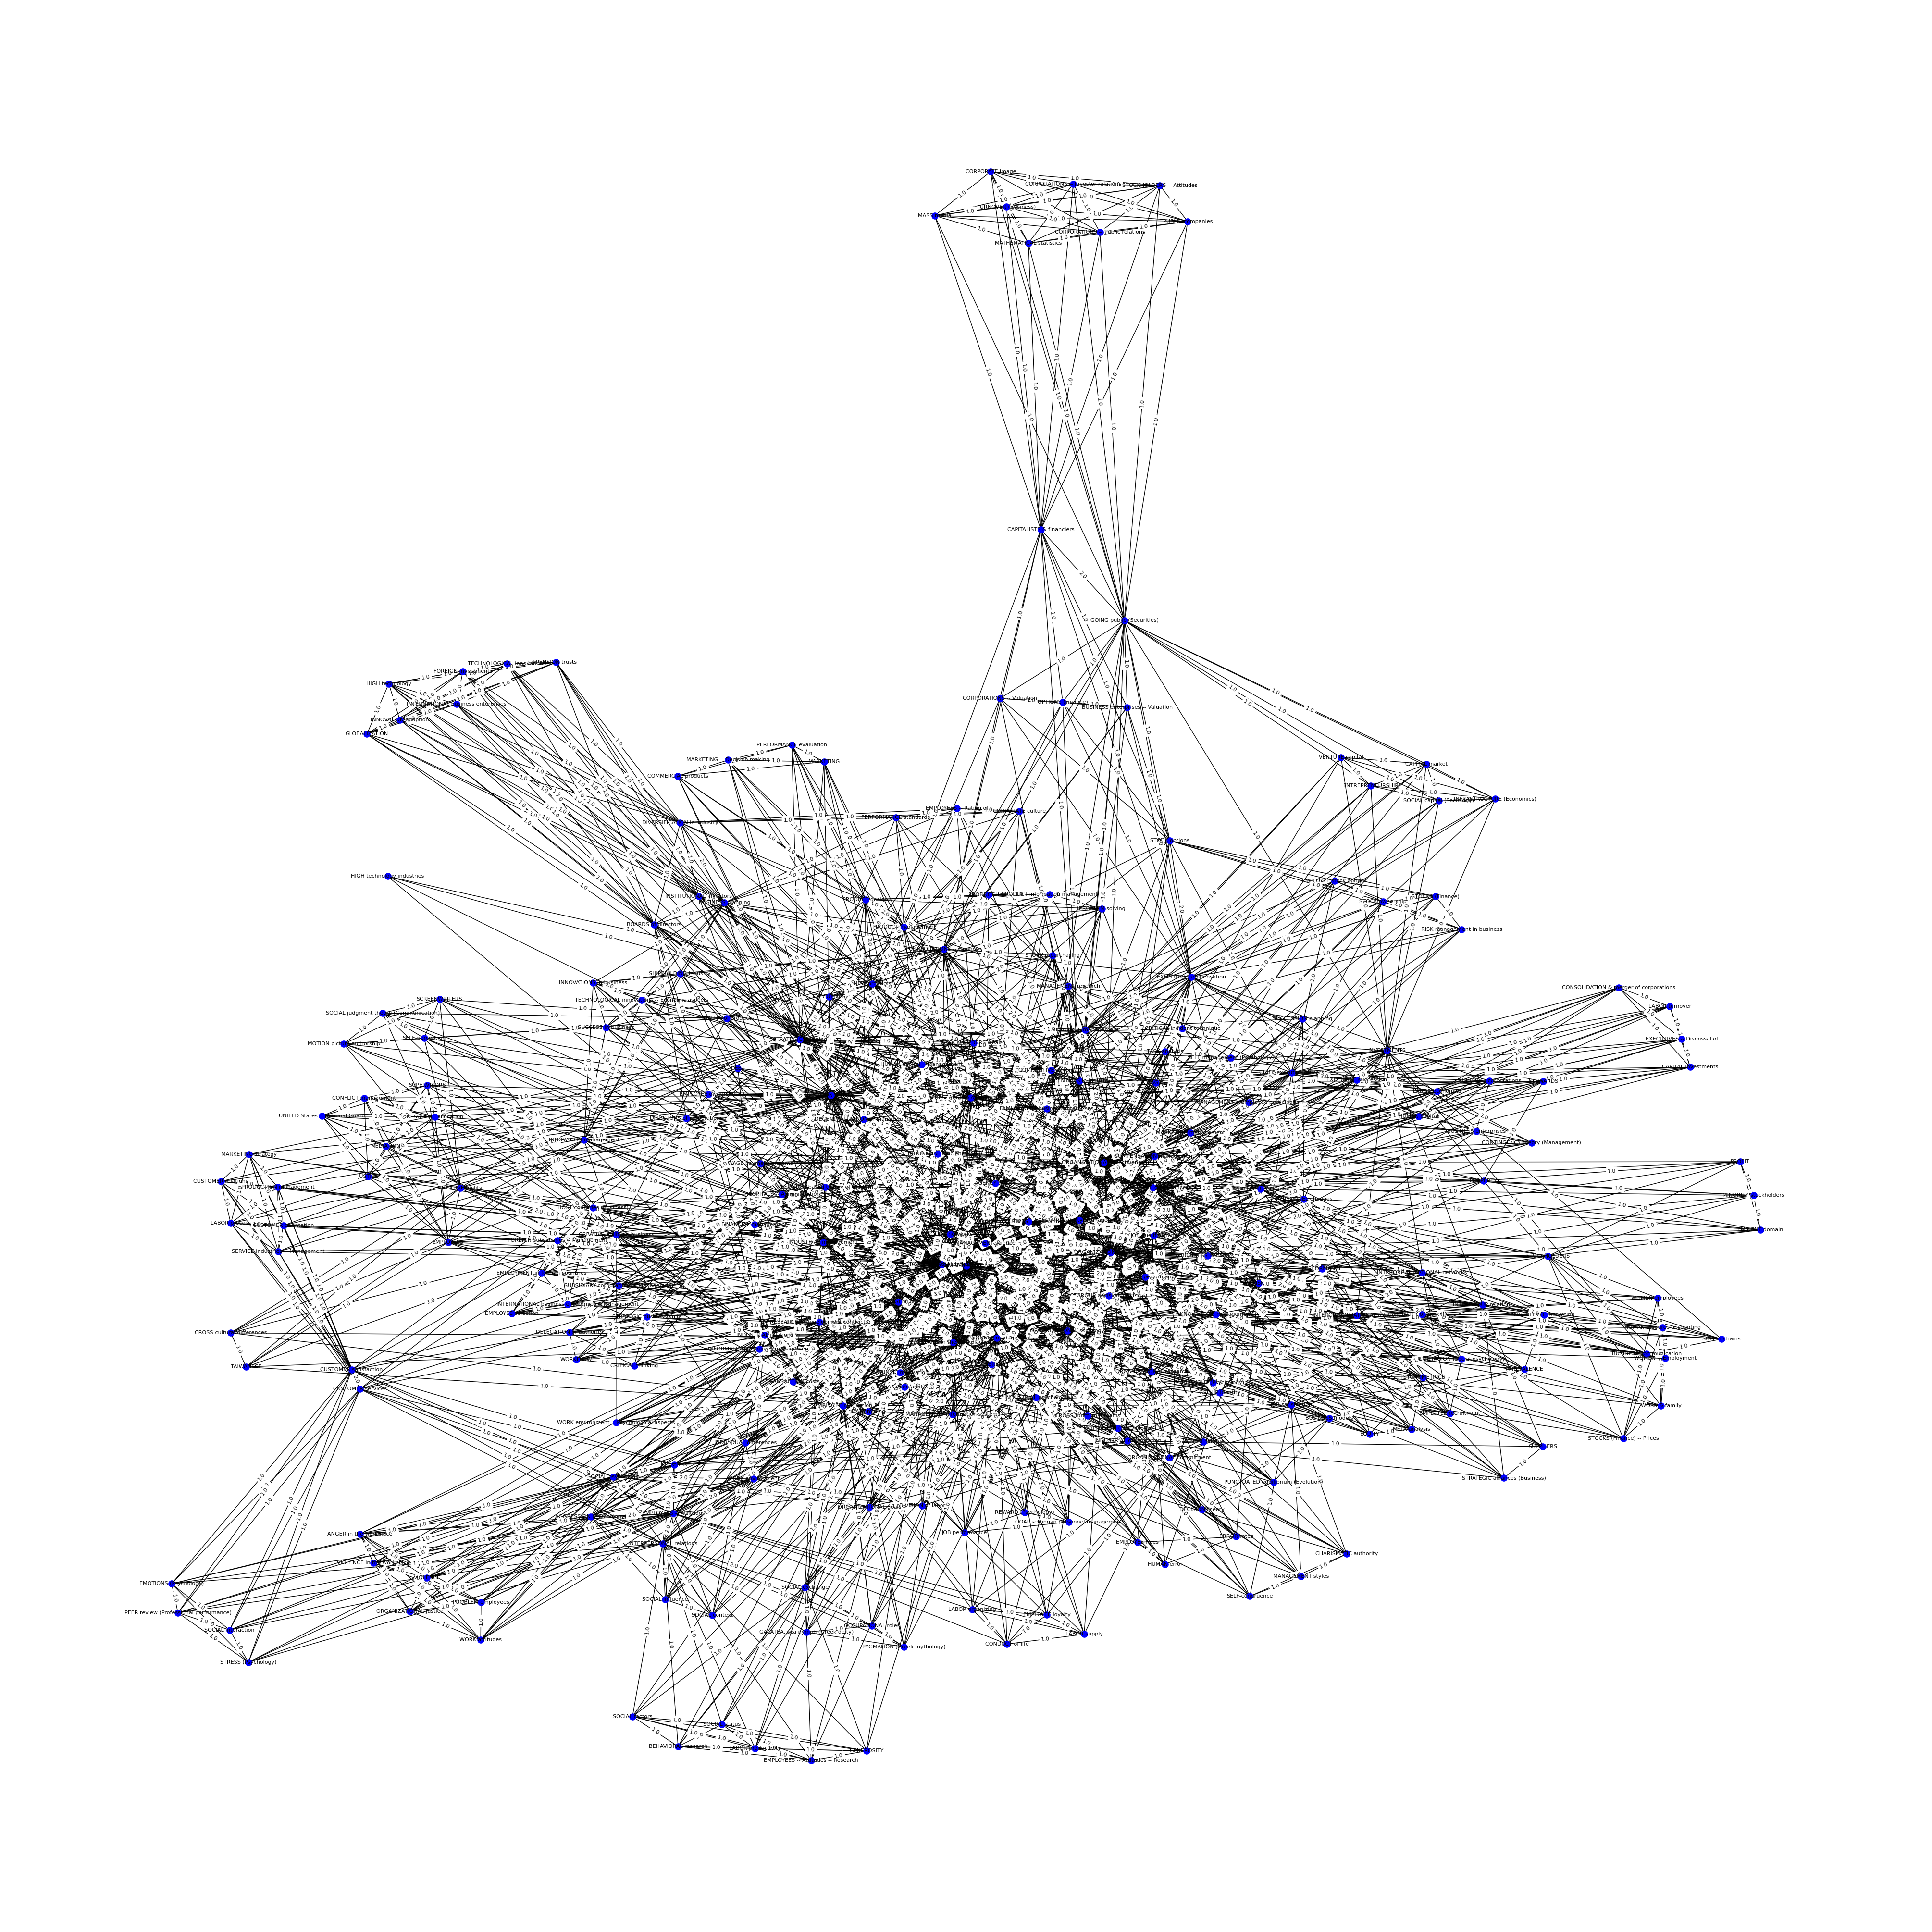

In [23]:
# convert the dataframe to a weighted graph

G = nx.from_pandas_adjacency(wam)




# set the positions of the nodes

pos = nx.spring_layout(G)




# get the edge weights as a dictionary

weights = nx.get_edge_attributes(G, 'weight')




# draw the graph with edge labels

plt.figure(figsize=(40, 40))

nx.draw(G, pos, with_labels=True, node_color='blue', node_size=90, font_size=8)

nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=8)




# show the graph

plt.show()



In [24]:
#function for converting adjacency matrix to weighted network 

plt.figure(figsize = (100,125))

def plot_weighted_graph(wam):
    matrix = wam.to_numpy().reshape((wam.shape[0], wam.shape[1]))
    printed_combinations = set()

    indices = np.argsort(matrix, axis=None)[::-1]

    # Convert the flattened indices back to row and column indices
    rows, cols = np.unravel_index(indices, matrix.shape)

    G = nx.Graph()
    for row, col in zip(rows, cols):
        if row != col:
            row_label = wam.index[row]
            col_label = wam.columns[col]
            if (col_label, row_label) not in printed_combinations:
                weightt = matrix[row, col]
                if weightt >= 1:
                    G.add_edge(row_label, col_label, weight=weightt)
                    printed_combinations.add((row_label, col_label))
    
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 6]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 6]

    #pos = nx.spring_layout(G, seed=15)  # positions for all nodes - seed for reproducibility
    
    pos = nx.spring_layout(G, seed=7, k=20/np.sqrt(G.number_of_nodes()))

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=300)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
    nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
    )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.00000000000000001)
    plt.axis("off")
    plt.tight_layout()
  


<Figure size 10000x12500 with 0 Axes>

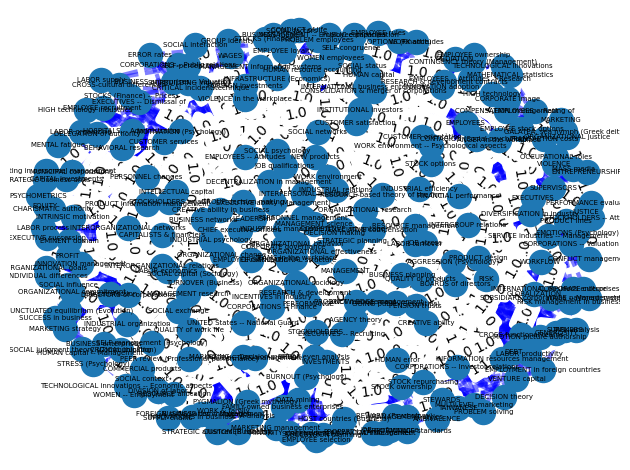

In [25]:
#plotting the weighted network by filtering weights greater than or equal to 1
plot_weighted_graph(wam)
plt.show()

In [26]:
#function for converting adjacency matrix to weighted network 

plt.figure(figsize = (100,125))

def plot_weighted_graph(wam):
    matrix = wam.to_numpy().reshape((wam.shape[0], wam.shape[1]))
    printed_combinations = set()

    indices = np.argsort(matrix, axis=None)[::-1]

    # Convert the flattened indices back to row and column indices
    rows, cols = np.unravel_index(indices, matrix.shape)

    G = nx.Graph()
    for row, col in zip(rows, cols):
        if row != col:
            row_label = wam.index[row]
            col_label = wam.columns[col]
            if (col_label, row_label) not in printed_combinations:
                weightt = matrix[row, col]
                if weightt >= 2:
                    G.add_edge(row_label, col_label, weight=weightt)
                    printed_combinations.add((row_label, col_label))
    
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 6]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 6]

    #pos = nx.spring_layout(G, seed=15)  # positions for all nodes - seed for reproducibility
    
    pos = nx.spring_layout(G, seed=7, k=20/np.sqrt(G.number_of_nodes()))

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=300)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
    nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
    )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.00000000000000001)
    plt.axis("off")
    plt.tight_layout()
  


<Figure size 10000x12500 with 0 Axes>

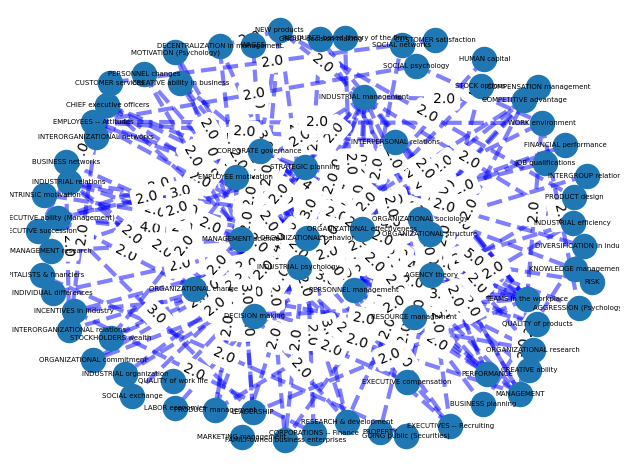

In [27]:
#plotting the weighted network by filtering weights greater than or equal to 2
plot_weighted_graph(wam)
plt.show()

In [28]:
#function for converting adjacency matrix to weighted network 

plt.figure(figsize = (100,125))

def plot_weighted_graph(wam):
    matrix = wam.to_numpy().reshape((wam.shape[0], wam.shape[1]))
    printed_combinations = set()

    indices = np.argsort(matrix, axis=None)[::-1]

    # Convert the flattened indices back to row and column indices
    rows, cols = np.unravel_index(indices, matrix.shape)

    G = nx.Graph()
    for row, col in zip(rows, cols):
        if row != col:
            row_label = wam.index[row]
            col_label = wam.columns[col]
            if (col_label, row_label) not in printed_combinations:
                weightt = matrix[row, col]
                if weightt >= 3:
                    G.add_edge(row_label, col_label, weight=weightt)
                    printed_combinations.add((row_label, col_label))
    
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 6]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 6]

    #pos = nx.spring_layout(G, seed=15)  # positions for all nodes - seed for reproducibility
    
    pos = nx.spring_layout(G, seed=7, k=20/np.sqrt(G.number_of_nodes()))

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=300)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
    nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
    )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.00000000000000001)
    plt.axis("off")
    plt.tight_layout()
  


<Figure size 10000x12500 with 0 Axes>

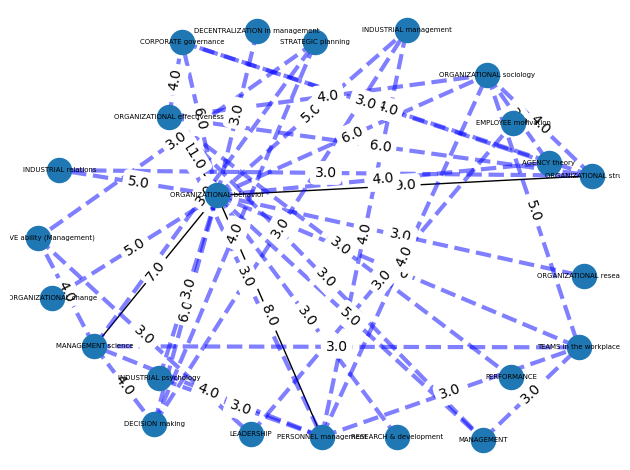

In [29]:
#plotting the weighted network by filtering weights greater than or equal to 3
plot_weighted_graph(wam)
plt.show()

In [30]:
#function for converting adjacency matrix to weighted network 

plt.figure(figsize = (100,125))

def plot_weighted_graph(wam):
    matrix = wam.to_numpy().reshape((wam.shape[0], wam.shape[1]))
    printed_combinations = set()

    indices = np.argsort(matrix, axis=None)[::-1]

    # Convert the flattened indices back to row and column indices
    rows, cols = np.unravel_index(indices, matrix.shape)

    G = nx.Graph()
    for row, col in zip(rows, cols):
        if row != col:
            row_label = wam.index[row]
            col_label = wam.columns[col]
            if (col_label, row_label) not in printed_combinations:
                weightt = matrix[row, col]
                if weightt >= 4:
                    G.add_edge(row_label, col_label, weight=weightt)
                    printed_combinations.add((row_label, col_label))
    
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 6]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 6]

    #pos = nx.spring_layout(G, seed=15)  # positions for all nodes - seed for reproducibility
    
    pos = nx.spring_layout(G, seed=7, k=20/np.sqrt(G.number_of_nodes()))

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=300)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
    nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
    )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.00000000000000001)
    plt.axis("off")
    plt.tight_layout()
  


<Figure size 10000x12500 with 0 Axes>

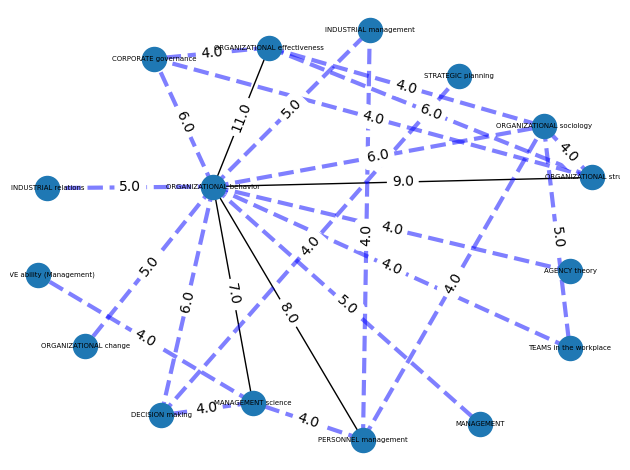

In [31]:
#plotting the weighted network by filtering weights greater than or equal to 4
plot_weighted_graph(wam)
plt.show()

# Node Pairs by Weight

In [32]:
#function for finding node pairs by weight

def get_weight_pairs(wam):
    matrix = wam.to_numpy().reshape((wam.shape[0], wam.shape[1]))
    printed_combinations = set()

    indices = np.argsort(matrix, axis=None)[::-1]

    # Convert the flattened indices back to row and column indices
    rows, cols = np.unravel_index(indices, matrix.shape)

    # Store node pairs and weights in a DataFrame
    data = []
    for row, col in zip(rows, cols):
        if row != col:
            row_label = wam.index[row]
            col_label = wam.columns[col]
            if (col_label, row_label) not in printed_combinations:
                weight = matrix[row, col]
                data.append({'Keyword 1': f"{row_label}", 'Keyword 2': f" {col_label}", 'Weight': weight})
                printed_combinations.add((row_label, col_label))

    df = pd.DataFrame(data)

    # Sort the DataFrame by weight in descending order
    df = df.sort_values(by='Weight', ascending=False)

    # Reset the index of the DataFrame
    df = df.reset_index(drop=True)

    # Return the DataFrame
    return df

In [33]:
#calling the function of node pairs by weight
df_wp = get_weight_pairs(wam)
df_wp

Keyword 1                      Keyword 2  Weight
0           ORGANIZATIONAL behavior   ORGANIZATIONAL effectiveness    11.0
1          ORGANIZATIONAL structure        ORGANIZATIONAL behavior     9.0
2           ORGANIZATIONAL behavior           PERSONNEL management     8.0
3                MANAGEMENT science        ORGANIZATIONAL behavior     7.0
4      ORGANIZATIONAL effectiveness       ORGANIZATIONAL structure     6.0
...                             ...                            ...     ...
30623               CONDUCT of life                    PERFORMANCE     0.0
30624               CONDUCT of life               STOCKS (Finance)     0.0
30625               CONDUCT of life        INDUSTRIAL organization     0.0
30626               CONDUCT of life                       VIOLENCE     0.0
30627    EXECUTIVES -- Dismissal of    CRITICAL incident technique     0.0

[30628 rows x 3 columns]

# Top 10 Node Pairs by Weight

In [34]:
#top 10 node pairs by weight
df_wp.head(10)

Keyword 1                      Keyword 2  Weight
0       ORGANIZATIONAL behavior   ORGANIZATIONAL effectiveness    11.0
1      ORGANIZATIONAL structure        ORGANIZATIONAL behavior     9.0
2       ORGANIZATIONAL behavior           PERSONNEL management     8.0
3            MANAGEMENT science        ORGANIZATIONAL behavior     7.0
4  ORGANIZATIONAL effectiveness       ORGANIZATIONAL structure     6.0
5      ORGANIZATIONAL sociology        ORGANIZATIONAL behavior     6.0
6               DECISION making        ORGANIZATIONAL behavior     6.0
7          CORPORATE governance        ORGANIZATIONAL behavior     6.0
8       ORGANIZATIONAL behavior           INDUSTRIAL relations     5.0
9      ORGANIZATIONAL sociology         TEAMS in the workplace     5.0

# Average Strengths by Degree

In [35]:
#function for computing average strengths for each unique degrees

def get_strengths_by_degree(matrix):
    matrix = wam.to_numpy().reshape((matrix.shape[0], matrix.shape[1]))

    # get the degree of each node
    deg = np.sum(matrix >=1 , axis=1)
    
    # calculate the strength of each node
    strn = np.sum(matrix, axis=1)
    
    # create a data frame to store the results
    res = pd.DataFrame(columns=['degree', 'average_strength'])
    
    # find the unique degrees and their corresponding average strengths
    for d in np.unique(deg):
        indices = np.where(deg == d)[0]
        avg_strength = np.mean(strn[indices])
        
        # add the results to the data frame
        res = res.append({'degree': d, 'average_strength': avg_strength}, ignore_index=True)
    
    # return the results as a data frame
    return res


In [36]:
#calling the function to print degrees and their corresponding average strengths
df_plot = get_strengths_by_degree(wam)
df_plot

degree  average_strength
0      4.0          4.000000
1      7.0          7.000000
2      8.0          8.000000
3      9.0          9.000000
4     10.0         10.000000
5     11.0         11.000000
6     14.0         14.500000
7     15.0         16.000000
8     16.0         18.200000
9     17.0         18.153846
10    18.0         19.200000
11    19.0         20.500000
12    20.0         20.400000
13    21.0         21.666667
14    23.0         27.500000
15    24.0         27.666667
16    25.0         27.000000
17    26.0         30.250000
18    27.0         30.000000
19    28.0         30.000000
20    29.0         31.000000
21    31.0         37.000000
22    32.0         36.000000
23    35.0         44.000000
24    37.0         45.500000
25    38.0         48.000000
26    41.0         53.000000
27    42.0         47.000000
28    46.0         57.000000
29    48.0         60.000000
30    49.0         59.000000
31    55.0         78.000000
32    62.0         85.000000
33    64.0         84.000000
34    66.0         88.000000
35    74.0        107.000000
36    90.0        112.000000
37    93.0        126.000000
38   102.0        136.000000
39   104.0        144.000000
40   166.0        265.000000

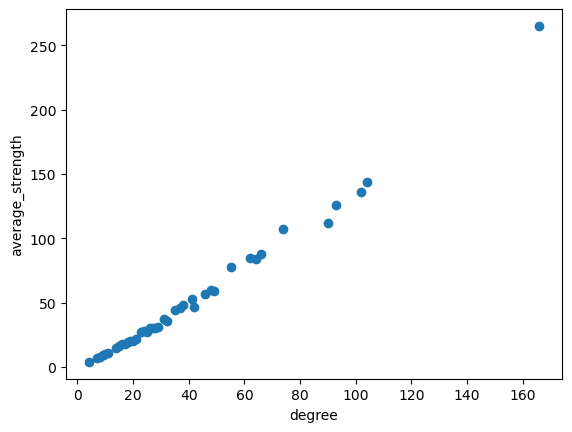

In [37]:
#plotting the average strength by degree

plt.scatter(df_plot["degree"], df_plot["average_strength"])

plt.xlabel("degree")
plt.ylabel("average_strength")

plt.show()